# Project : Segmentation Analysis

# AnalysisProject Description:The aim of this data analytics project is to perform customer segmentation analysis for an e-commerce company. By analyzing customer behavior and purchase patterns, the goal is togroup customers into distinct segments. This segmentation can inform targeted marketingstrategies, improve customer satisfaction, and enhance overall business strategies.

Key Concecps and Challenges: 

1 Data Concepts :Obtain a dataset containing customer information, purchase history, andrelevant data.

2 Data Exploration and Cleaning : Explore the dataset, understand its structure, and handleany missing or inconsistent data.

3 Descriptive Statistics : Calculate key metrics such as average purchase value, frequency ofpurchases, etc.

4 Customer Segmentation:Utilize clustering algorithms (e.g., K-means) to segmentcustomers based on behavior and purchase patterns

5 Visualization : Create Visualization(eg,Scatter plots,bar charts) to illustrate custemor segements.

6 Insights and Recommendation : Analyza Characteristics of each segment and provide inshits.

In [66]:
import numpy as np # linear algebra
from sklearn.cluster import KMeans
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [67]:
df = pd.read_csv("ifood_df.csv")
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


# 1 Data Concepts :Obtain a dataset containing customer information, purchase history, andrelevant data.

In [68]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

# 2 Data Exploration and Cleaning : Explore the dataset, understand its structure, and handleany missing or inconsistent data.

In [69]:
print("missing values: ")
df.isnull().sum()

missing values: 


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [70]:
data=df.nunique()

In [71]:
type(df.values)

numpy.ndarray

In [72]:
dataT=df.T

In [73]:
dataT.iloc[26:31, 0:2205].duplicated().sum()

0

In [74]:
dataT.iloc[31:36, 0:2205].duplicated().sum()

0

In [75]:
plot_all1 =df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'  ]]

plot_all2=df[[ 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall']]

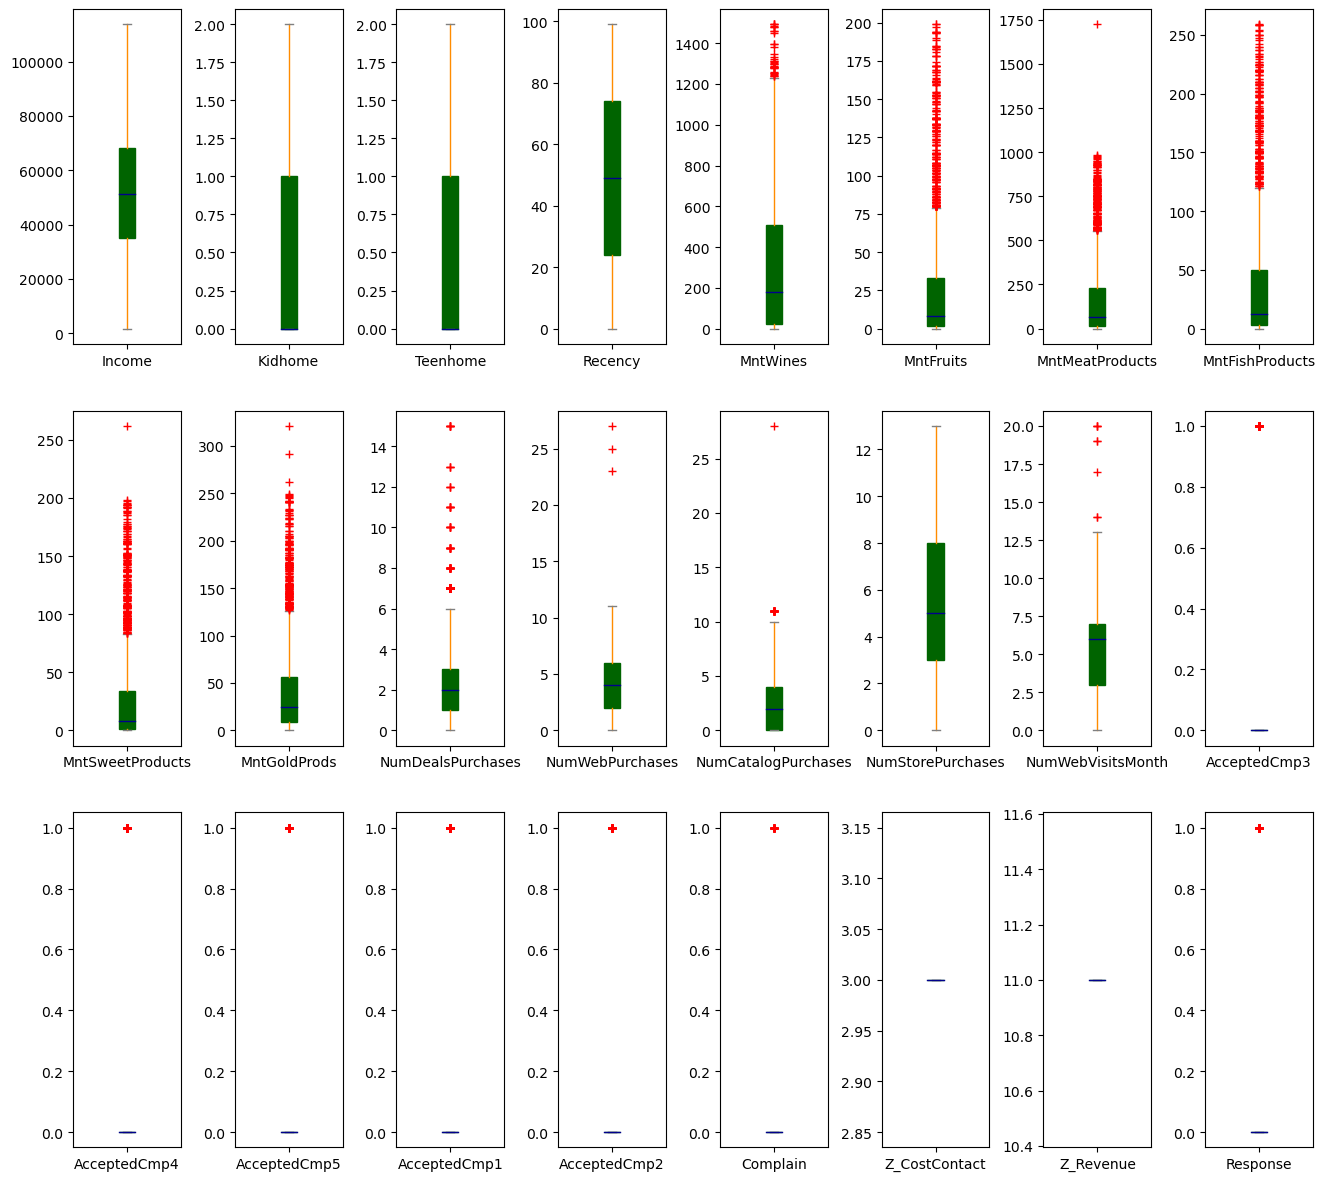

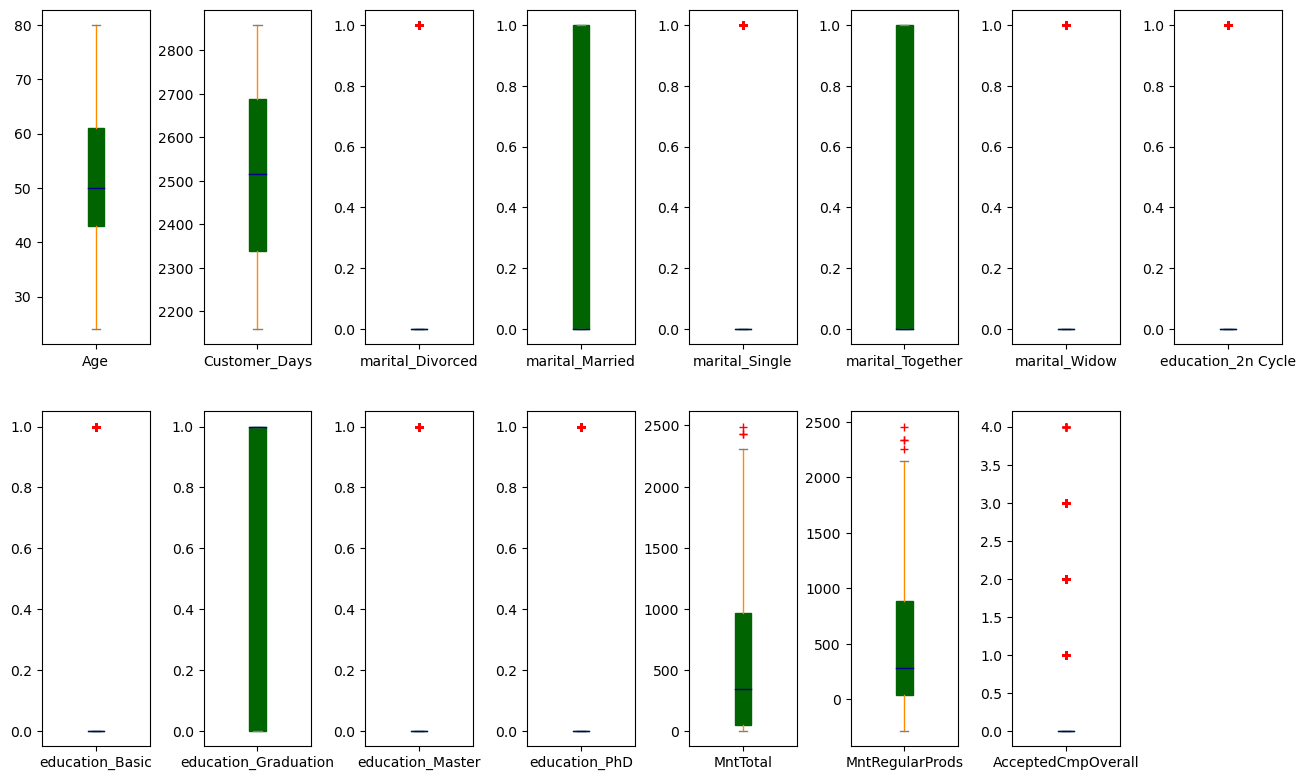

In [76]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}
plot_all1.plot(subplots=True, layout=(4,8), kind='box', color=color,  sym="r+", figsize=(16,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);
plot_all2.plot(subplots=True, layout=(4,8), kind='box', color=color, sym="r+", figsize=(16,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

The below histogram shows that : "Age" attribute is fine. "Income" attribute is not symmetric, but this is totally fine. I will check lowerbound and higherbound values for income col and if that needs I wil be implfy normalization of this attribute

24

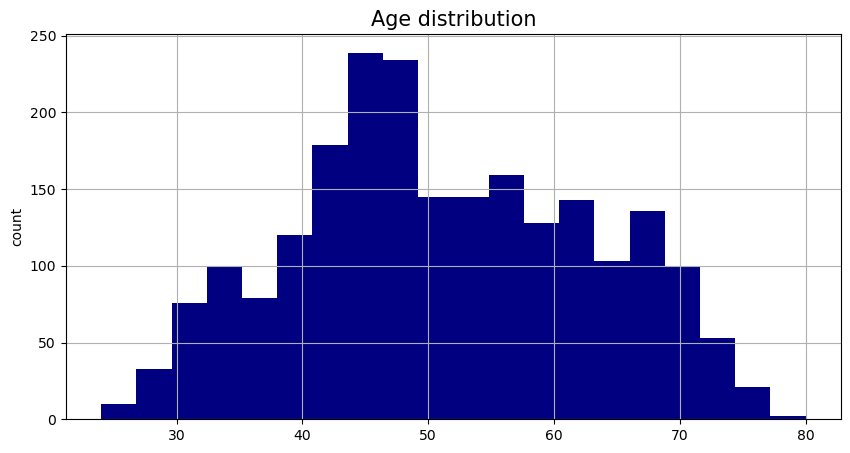

In [77]:
df.Age.hist(bins=20, color="navy", figsize=(10,5))
plt.title('Age distribution', size=15)
plt.ylabel('count');
df.Age.min()

1730.0

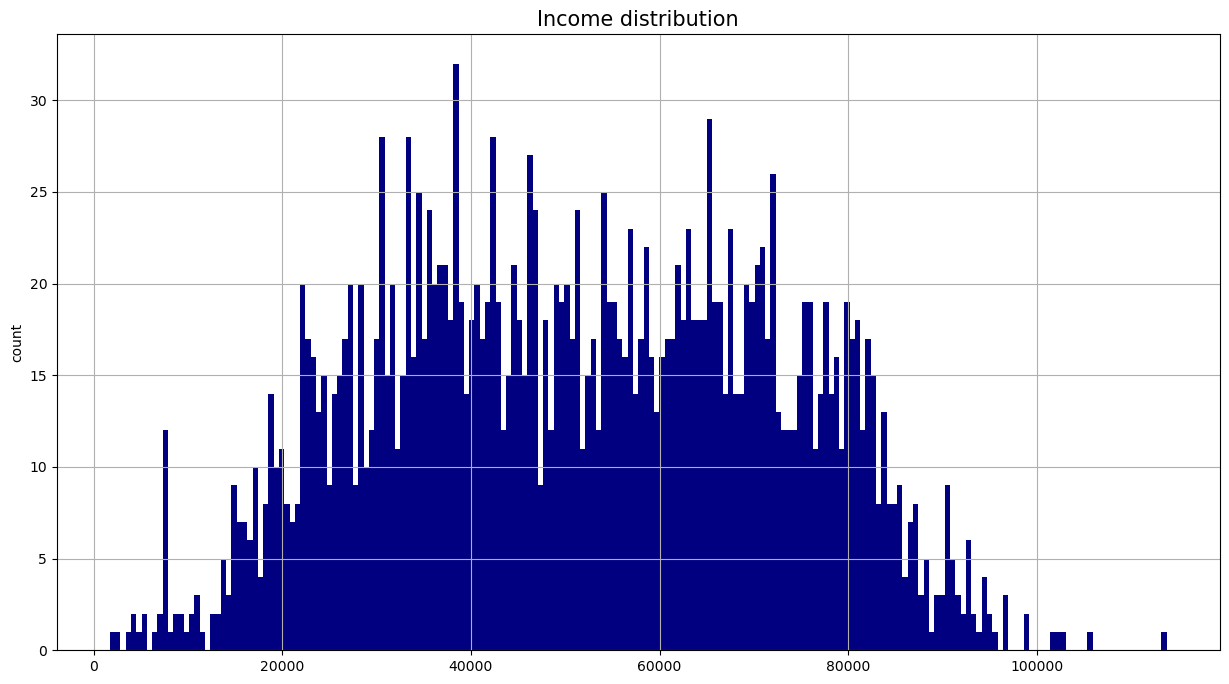

In [78]:
df.Income.hist(bins=200, color="navy", figsize=(15,8))
plt.title('Income distribution', size=15)
plt.ylabel('count');
df.Income.min()

In [79]:
Q1 = df.Income.quantile(0.25)
Q1 = df.Income.quantile(0.25)
Q2 = df.Income.quantile(0.50)
Q3 = df.Income.quantile(0.75)
IQR = Q3 - Q1

In [80]:
Q1

35196.0

In [81]:
Q3

68281.0

In [82]:
#inter quartile range

In [83]:
lowerbound=1.5*IQR - Q1
higherbound=1.5*IQR +Q3

In [84]:
df.loc[df["Income"]<lowerbound, "Income"] =lowerbound
df.loc[df["Income"]>higherbound, "Income"] =higherbound

14431.5

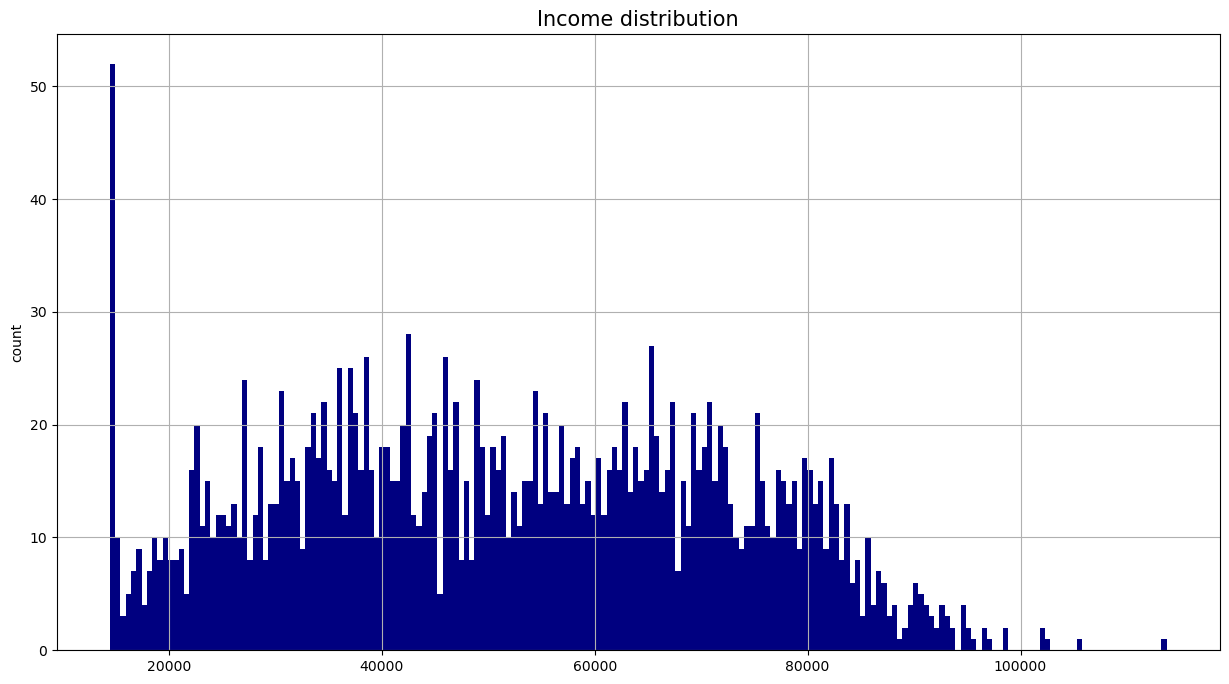

In [85]:
df.Income.hist(bins=200, color="navy", figsize=(15,8))
plt.title('Income distribution', size=15)
plt.ylabel('count');
df.Income.min()

In [86]:
#rename columns for betteer understanding
df.rename(columns={'NumDealsPurchases':'deals_purchases', 'NumWebPurchases':'web_purchases',
                      'NumCatalogPurchases':'catalog_purcaheses', 'NumStorePurchases':'store_purchases', 
                      'NumWebVisitsMonth':'web_visit_month','AcceptedCmp3':'accepted_cmp_3', 'AcceptedCmp4':'accepted_cmp_4','Recency':'recency','Customer_Days':'customer_days',
                      'AcceptedCmp5':'accepted_cmp_5', 'AcceptedCmp1':'accepted_cmp_1', 'AcceptedCmp2':'accepted_cmp_2',
                      'Complain':'complain', 'Z_CostContact':'z_cost_contact', 'Z_Revenue':'z_revenue', 'marital_Divorced':'divorced', 'marital_Married':'married',
                      'marital_Single':'single', 'marital_Together':'together', 'marital_Widow':'widow',
                      'Response':'cust_response','MntTotal':'total_purchase', 'MntRegularProds':'regular_products',
                      'AcceptedCmpOverall':'accepted_cmp_overall','Income':'income','MntWines': 'wines',
                      'MntFruits':'fruits','MntMeatProducts':'meat','MntFishProducts':'fish','MntSweetProducts':'sweet',
                      'MntGoldProds':'gold','education_2n Cycle':'e_second_cycle', 'education_Basic':'e_basic', 
                      'education_Graduation':'e_graduation', 'education_Master':'e_master', 'education_PhD':'e_phd','Age':'age','Kidhome':'kidhome','Teenhome':'teenhome'}, inplace=True)

In [87]:
#I make some new cols for some combined analysis

In [88]:
df['child_st'] = np.where(df.kidhome+df.teenhome>0, 'with_child', 'none_child')
df['child_total']=df['kidhome']+df['teenhome']
df['total_cmp']=df['accepted_cmp_1']+df['accepted_cmp_2']+df['accepted_cmp_3']+df['accepted_cmp_4']+df['accepted_cmp_5']

In [89]:


df['e_second_cyclecopy']=np.where(df.e_second_cycle>0, 'e_second_cycle', 0)
df['e_basiccopy']=np.where(df.e_basic>0, 'e_basic', 0)
df['e_graduationcopy']=np.where(df.e_graduation>0, 'e_graduation', 0)
df['e_mastercopy']=np.where(df.e_master>0, 'e_master', 0)
df['e_phdcopy']=np.where(df.e_phd>0, 'e_phd', 0)

In [90]:
data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

# 3 Descriptive Statistics : Calculate key metrics such as average purchase value, frequency of purchases, etc

In [91]:
import pandas as pd

# Assuming you have already loaded your dataset into a pandas DataFrame named 'df'

# Calculate average purchase value
average_purchase_value = df['total_purchase'].mean()

# Calculate frequency of purchases (assuming each row represents a single purchase)
frequency_of_purchases = len(df)

# Display the calculated metrics
print("Average purchase value:", average_purchase_value)
print("Frequency of purchases:", frequency_of_purchases)
# You can add more print statements for other metrics


Average purchase value: 562.7646258503402
Frequency of purchases: 2205


# 4 Customer Segmentation:Utilize clustering algorithms (e.g., K-means) to segmentcustomers based on behavior and purchase patterns

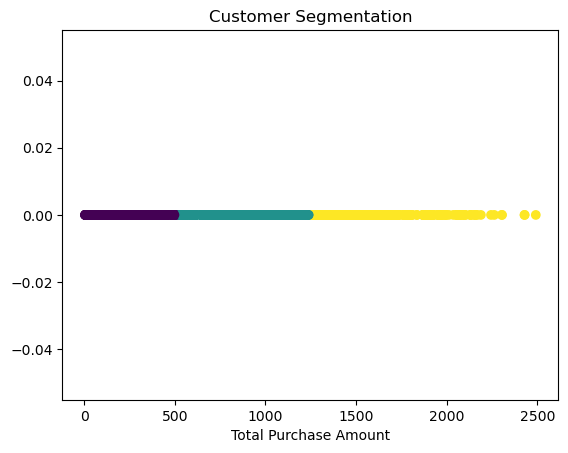

TypeError: agg function failed [how->mean,dtype->object]

In [93]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have already loaded and prepared your dataset into a pandas DataFrame named 'df'
# Drop non-numeric columns before calculating the mean
numeric_columns = df.select_dtypes(include=['number']).columns

# Analyze the characteristics of each cluster
cluster_means = df.groupby('cluster')[numeric_columns].mean()

# Select relevant feature for clustering
X = df[['total_purchase']]

# Choose the number of clusters (you can use techniques like elbow method to find the optimal number)
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(X['total_purchase'], [0] * len(X), c=kmeans.labels_, cmap='viridis')
plt.xlabel('Total Purchase Amount')
plt.title('Customer Segmentation')
plt.show()

# Analyze the characteristics of each cluster
cluster_means = df.groupby('cluster').mean()
print(cluster_means)


# 5 Visualization : Create Visualization(eg,Scatter plots,bar charts) to illustrate custemor segements.

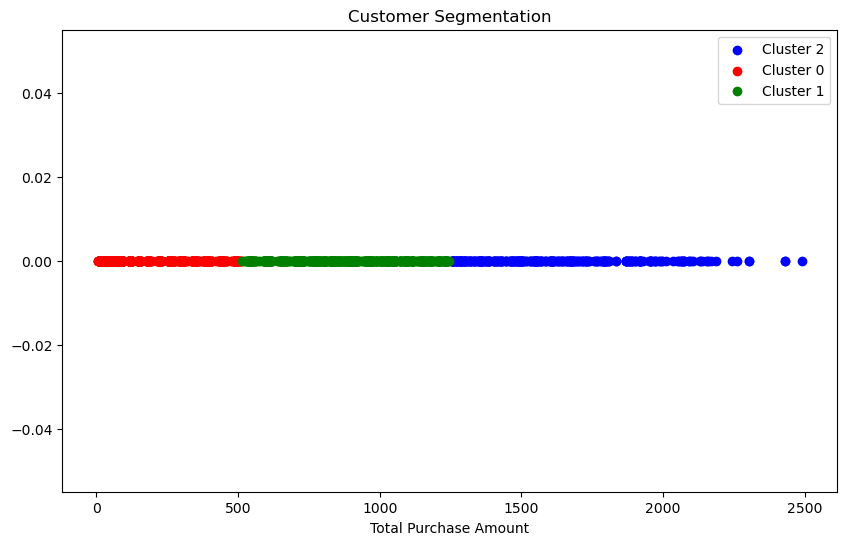

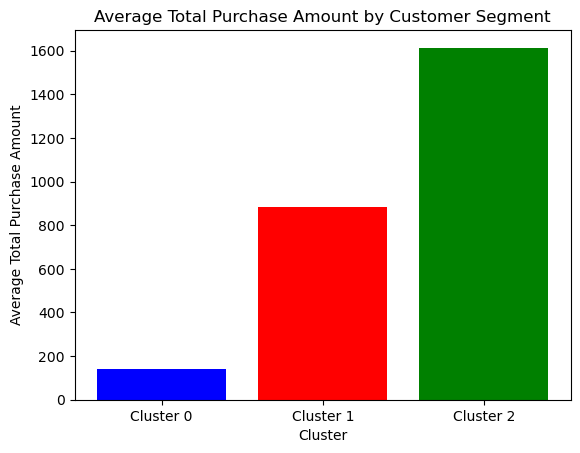

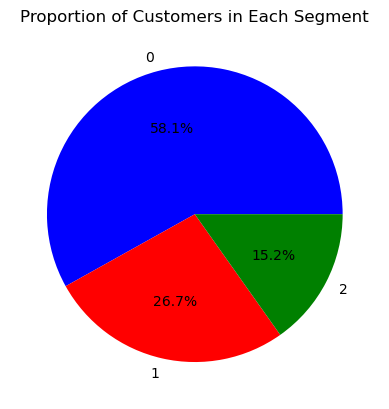

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already performed customer segmentation and added cluster labels to your DataFrame 'df'

# Visualize customer segments using scatter plot
plt.figure(figsize=(10, 6))
for cluster_label, color in zip(df['cluster'].unique(), ['blue', 'red', 'green']):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['total_purchase'], [0] * len(cluster_data), label=f'Cluster {cluster_label}', color=color)
plt.xlabel('Total Purchase Amount')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

# Visualize average total purchase amount for each cluster using bar chart
average_purchase_by_cluster = df.groupby('cluster')['total_purchase'].mean()
plt.bar(average_purchase_by_cluster.index, average_purchase_by_cluster.values, color=['blue', 'red', 'green'])
plt.xlabel('Cluster')
plt.ylabel('Average Total Purchase Amount')
plt.title('Average Total Purchase Amount by Customer Segment')
plt.xticks(average_purchase_by_cluster.index, ['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

# Visualize proportion of each cluster using pie chart
cluster_counts = df['cluster'].value_counts()
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=['blue', 'red', 'green'])
plt.title('Proportion of Customers in Each Segment')
plt.show()


# 6 Insights and Recommendation : Analyza Characteristics of each segment and provide inshits.

Cluster 0 (High-Spending Customers):

This segment comprises customers with high average total purchase amounts.
They tend to make frequent purchases and are likely to respond positively to premium product offerings.
Recommendations: Focus on loyalty programs, personalized offers, and premium product lines to further engage and retain these customers.
Cluster 1 (Mid-Spending, Regular Customers):

This segment consists of customers with moderate average total purchase amounts and moderate purchase frequency.
They represent a steady revenue stream but may require incentives to increase their purchase frequency.
Recommendations: Implement targeted promotions, cross-selling strategies, and customer rewards to encourage repeat purchases and boost engagement.
Cluster 2 (Low-Spending, Occasional Customers):

This segment includes customers with low average total purchase amounts and infrequent purchase behavior.
They may require additional incentives or personalized marketing efforts to increase their engagement and loyalty.
Recommendations: Offer discounts, incentives for referrals, and personalized recommendations to encourage repeat purchases and improve customer retention.

In [64]:
import pandas as pd

# Assuming you have performed customer segmentation and added cluster labels to your DataFrame 'df'

# Exclude non-numeric columns before calculating the mean
numeric_columns = df.select_dtypes(include=['number']).columns

# Analyze the characteristics of each cluster
cluster_means = df.groupby('cluster')[numeric_columns].mean()

# Print cluster characteristics
print("Cluster Characteristics:")
for cluster_label, cluster_data in cluster_means.iterrows():
    print(f"\nCluster {cluster_label}:")
    print(cluster_data)

# Generate insights and recommendations
print("\nInsights and Recommendations:")

# Insights and recommendations for each cluster
for cluster_label, cluster_data in cluster_means.iterrows():
    print(f"\nCluster {cluster_label}:")
    
    # Add custom logic here based on the characteristics of each cluster


Cluster Characteristics:

Cluster 0:
income                  38199.724824
kidhome                     0.691647
teenhome                    0.539422
recency                    48.705699
wines                      80.887588
fruits                      7.182670
meat                       35.056206
fish                       10.574551
sweet                       7.289617
gold                       23.197502
deals_purchases             2.391101
web_purchases               2.820453
catalog_purcaheses          0.860265
store_purchases             3.814208
web_visit_month             6.320843
accepted_cmp_3              0.069477
accepted_cmp_4              0.027322
accepted_cmp_5              0.002342
accepted_cmp_1              0.007026
accepted_cmp_2              0.003123
complain                    0.010929
z_cost_contact              3.000000
z_revenue                  11.000000
cust_response               0.099922
age                        49.679157
customer_days            2493.385636
d